In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = {'name':['Jason', 'Molly', 'Tina', 'Jake','Amy'],
       'age': [42,52,36,24,73],
       'preTestScore': [4,24,31,2,3],
       'postTestScore': [25,94,57,62,70]}

In [3]:
df = pd.DataFrame(data,columns = ['name', 'age', 'preTestScore', 'postTestScore'])

In [4]:
df

,name,age,preTestScore,postTestScore
0,Jason,42,4,25
1,Molly,52,24,94
2,Tina,36,31,57
3,Jake,24,2,62
4,Amy,73,3,70


In [5]:
df['age'].sum()

227

In [6]:
df['age'].cumsum()

0     42
1     94
2    130
3    154
4    227
Name: age, dtype: int64

Este de arriba sirve para ver como es que va sumando todos los valores.

In [7]:
df['preTestScore'].sum()

64

In [8]:
df['postTestScore'].sum()

308

In [9]:
df['age'].count()

5

In [10]:
count_nan = len(df) - df.count()
count_nan

name             0
age              0
preTestScore     0
postTestScore    0
dtype: int64

Este de arriba es restar, mejor utilizar "isnull" porque te da el mismo resultado de manera mas facil.

In [11]:
df.isnull().sum()

name             0
age              0
preTestScore     0
postTestScore    0
dtype: int64

In [12]:
df['age'].min()

24

In [13]:
df['age'].max()

73

In [14]:
df['age'].max() - df['age'].min()

49

In [15]:
counts = df['age'].value_counts()
counts

52    1
73    1
42    1
36    1
24    1
Name: age, dtype: int64

In [16]:
df['age'].mean()

45.4

The following 2 formulas to get the median. The last is better fo us to have the value while the first is a table that shows this.

In [17]:
df['age'].sort_values()

3    24
2    36
0    42
1    52
4    73
Name: age, dtype: int64

In [18]:
df['age'].median()

42.0

In [19]:
df['age'].mode()

0    24
1    36
2    42
3    52
4    73
dtype: int64

In [20]:
df['age'].max() - df['age'].min()

49

In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

16.0

In [22]:
Q1

36.0

The last value of the first 25% of the data.

In [23]:
Q3

52.0

The last value of the first 75% of the data.

In [24]:
df['age'].var()

340.79999999999995

Var al final no termina de ser preciso. Hay que usar deviacion estandar

In [25]:
df['age'].std()

18.46076921474292

How many year is the curve apart from the mena (to the left and to the right)

In [26]:
df['age'].describe()

count     5.000000
mean     45.400000
std      18.460769
min      24.000000
25%      36.000000
50%      42.000000
75%      52.000000
max      73.000000
Name: age, dtype: float64

Al final, esta tabla te dice todo (median es el 50%, obviamente)

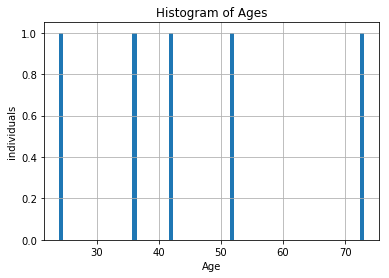

In [27]:
df['age'].hist(bins=75)
plt.title("Histogram of Ages")
plt.xlabel('Age')
plt.ylabel('individuals')

Bins es el ancho de la columna. El resto para ponerle titulo y labels

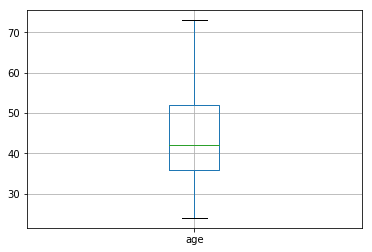

In [28]:
df.boxplot(column='age',sym='o',return_type='axes')

In [31]:
df['age_std'] = ((df['age'] - df['age'].mean()).apply(abs)/df['age'].std())
df.sort_values(by='age',ascending=False).head(6)

,name,age,preTestScore,postTestScore,age_std
4,Amy,73,3,70,1.495062
1,Molly,52,24,94,0.357515
0,Jason,42,4,25,0.184174
2,Tina,36,31,57,0.509188
3,Jake,24,2,62,1.159215


In [30]:
df['age_std'] = ((df['age'] - df['age'].mean()).apply(abs)/df['age'].std())
df.sort_values(by='age',ascending=True).head(6)

,name,age,preTestScore,postTestScore,age_std
3,Jake,24,2,62,1.159215
2,Tina,36,31,57,0.509188
0,Jason,42,4,25,0.184174
1,Molly,52,24,94,0.357515
4,Amy,73,3,70,1.495062


Both tables (the difference is the true or false, that orders the table from youngest to oldest or viceversa) is used to see how many standard deviations each value is away from the mean: 3.0 is considered an extreme outlier while 1.5 is considered maybe an outlier, but probably not. 

In [32]:
df['age'].skew()

0.70478411035663524

You need a frame of reference in order to know if the value is good or not. Either way, the closest to 0 the better.

In [33]:
df['age'].kurt()

0.60827774747074237

Less than 3: platykurtic
Greater than 3: Leptokurtic
Normal would be 3